In [62]:
import pandas as pd
import numpy as np
cabi_hr = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/bike+sharing+dataset/hour.csv')
cabi_hr_copy = cabi_hr.copy() 

In [217]:
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc,temp_in_c,year
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,3,13,16,winter,saturday,No,No,good,3.28,2011
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,8,32,40,winter,saturday,No,No,good,2.34,2011
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,5,27,32,winter,saturday,No,No,good,2.34,2011
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,3,10,13,winter,saturday,No,No,good,3.28,2011
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0,1,1,winter,saturday,No,No,good,3.28,2011


In [64]:
#hunting nans
nan_indices = cabi_hr.isna()
print(nan_indices.any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [65]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=cabi_hr.isna().sum().sum()
print(nan_count)

0


In [66]:
#hunting duplicates, none found
duplicateRows = cabi_hr[cabi_hr.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [68]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
cabi_hr['dteday'] = pd.to_datetime(cabi_hr['dteday'])
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [69]:
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [70]:
# we are creating a new column called "season_name", based on months, because the dataset
#season calculator is way way off
def sname_maker(month):
    if month == 12:
        return 'winter'
    elif month <= 2:
        return 'winter'
    elif month <= 5:
        return 'spring'
    elif month <= 8:
        return 'summer'
    elif month <= 11:
        return 'fall'

cabi_hr['season_name'] = cabi_hr['mnth'].apply(sname_maker)



In [98]:
# we are creating a new column called "", based on days of week, because the dataset
#days are 0-6, 0 is sunday, 6 is saturday
def yearname_maker(yr):
    if yr == 0:
        return '2011'
    elif yr == 1:
        return '2012'

cabi_hr['year'] = cabi_hr['yr'].apply(yearname_maker)

In [100]:
cabi_hr.head()
cabi_hr.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc,temp_in_c,year
17374,17375,2012-12-31,4,1,12,19,0,1,1,2,...,11,108,119,winter,monday,No,Yes,less_good_mist,4.22,2012
17375,17376,2012-12-31,4,1,12,20,0,1,1,2,...,8,81,89,winter,monday,No,Yes,less_good_mist,4.22,2012
17376,17377,2012-12-31,4,1,12,21,0,1,1,1,...,7,83,90,winter,monday,No,Yes,good,4.22,2012
17377,17378,2012-12-31,4,1,12,22,0,1,1,1,...,13,48,61,winter,monday,No,Yes,good,4.22,2012
17378,17379,2012-12-31,4,1,12,23,0,1,1,1,...,12,37,49,winter,monday,No,Yes,good,4.22,2012


In [71]:
# we are creating a new column called "dayname", based on days of week, because the dataset
#days are 0-6, 0 is sunday, 6 is saturday
def dname_maker(day):
    if day == 0:
        return 'sunday'
    elif day == 1:
        return 'monday'
    elif day == 2:
        return 'tuesday'
    elif day == 3:
        return 'wednesday'
    elif day == 4:
        return 'thursday'
    elif day == 5:
        return 'friday'
    elif day == 6:
        return 'saturday'

cabi_hr['dayname'] = cabi_hr['weekday'].apply(dname_maker)

In [72]:
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,monday
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,monday
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,monday
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,monday


In [73]:
cabi_hr.loc[17350:, 'temp']

17350    0.34
17351    0.22
17352    0.20
17353    0.20
17354    0.20
17355    0.18
17356    0.18
17357    0.16
17358    0.16
17359    0.14
17360    0.16
17361    0.16
17362    0.16
17363    0.14
17364    0.18
17365    0.20
17366    0.22
17367    0.24
17368    0.26
17369    0.28
17370    0.28
17371    0.26
17372    0.26
17373    0.26
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, dtype: float64

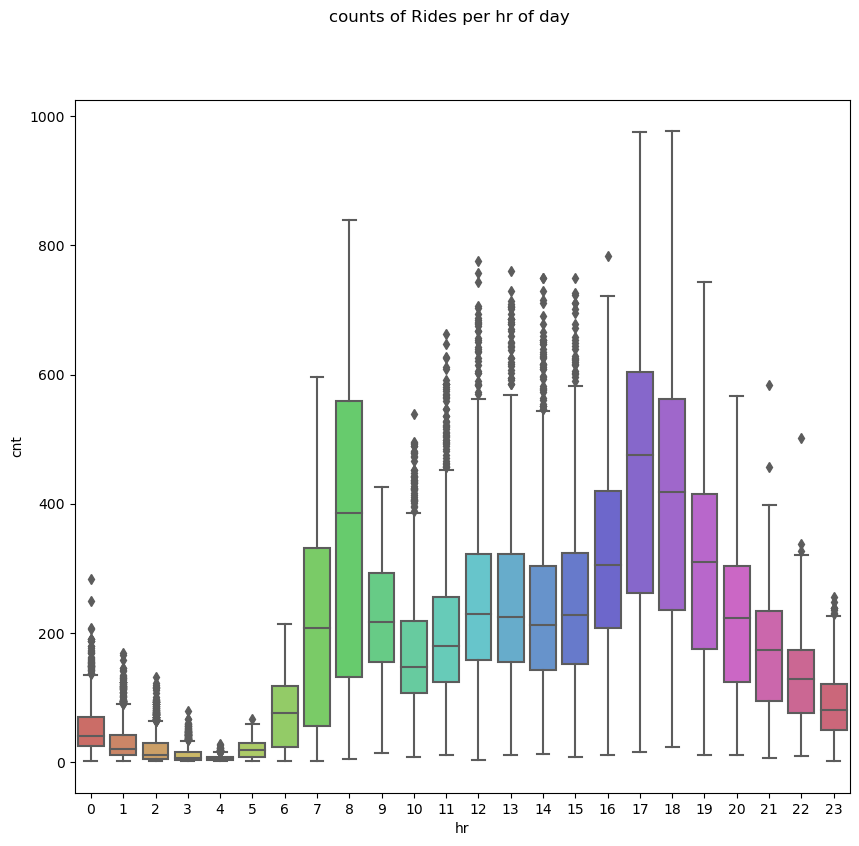

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,9))

sns.boxplot(data=cabi_hr, x='hr', y='cnt', palette='hls')
plt.suptitle('counts of Rides per hr of day')
plt.show()

In [13]:
cabi_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [75]:
#converting multiple columns to categorical
cabi_hr = cabi_hr.astype({'season': 'category', 'yr': 'category', 'mnth': 'category', 
                          'hr': 'category', 'holiday': 'category', 'weekday': 'category',
                           'workingday': 'category', 'weathersit': 'category', 
                           'season_name': 'category', 'dayname': 'category'})
cabi_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

In [76]:
cabi_hr.loc[cabi_hr['holiday'] == 0, 'is_holiday'] = 'No'
cabi_hr.loc[cabi_hr['holiday'] == 1, 'is_holiday'] = 'Yes'
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,saturday,No
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,saturday,No
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,saturday,No
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,saturday,No
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,monday,No
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,monday,No
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,monday,No
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,monday,No


In [77]:
cabi_hr.loc[cabi_hr['season_name'] == 'winter', 'season'] = 4
cabi_hr.loc[cabi_hr['season_name'] == 'spring', 'season'] = 1
cabi_hr.loc[cabi_hr['season_name'] == 'summer', 'season'] = 2
cabi_hr.loc[cabi_hr['season_name'] == 'fall', 'season'] = 3
cabi_hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday
0,1,2011-01-01,4,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,winter,saturday,No
1,2,2011-01-01,4,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,winter,saturday,No
2,3,2011-01-01,4,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,winter,saturday,No
3,4,2011-01-01,4,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,winter,saturday,No
4,5,2011-01-01,4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,winter,saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,4,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,winter,monday,No
17375,17376,2012-12-31,4,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,winter,monday,No
17376,17377,2012-12-31,4,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,winter,monday,No
17377,17378,2012-12-31,4,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,winter,monday,No


In [78]:
cabi_hr = cabi_hr.astype({'is_holiday': 'category'})
cabi_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   yr           17379 non-null  category      
 4   mnth         17379 non-null  category      
 5   hr           17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

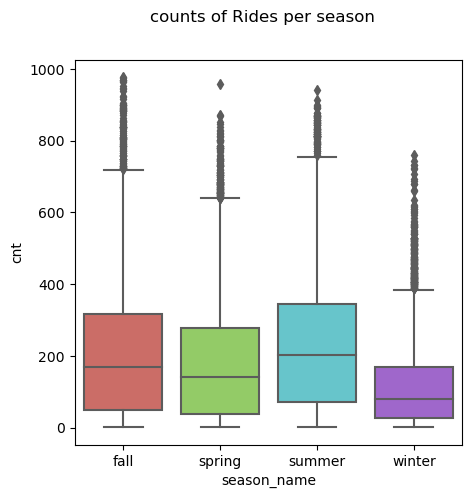

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))

sns.boxplot(data=cabi_hr, x='season_name', y='cnt', palette='hls')
plt.suptitle('counts of Rides per season')
plt.show()

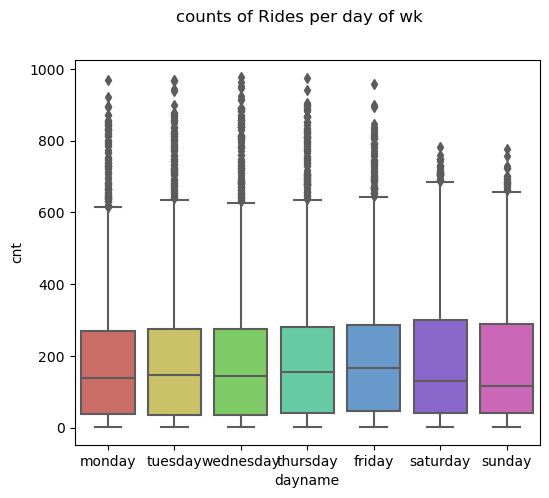

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,5))

sns.boxplot(data=cabi_hr, x='dayname', y='cnt', palette='hls', order=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.suptitle('counts of Rides per day of wk')
plt.show()

In [81]:
corr_cabi_hr = cabi_hr.corr()
corr_cabi_hr

/var/folders/dt/36zskqd97kv75gn6l517twyh0000gn/T/ipykernel_61848/4244322749.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cabi_hr = cabi_hr.corr()


,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


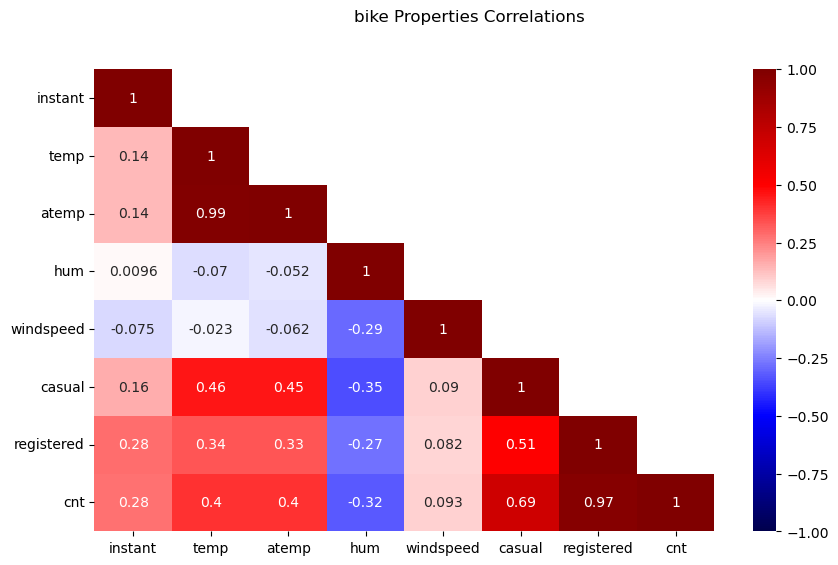

In [82]:
#seaborn heatmap using .corr
fig, ax = plt.subplots(figsize=(10,6))

# Create a mask
mask = np.triu(np.ones_like(corr_cabi_hr, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(corr_cabi_hr, annot=True, cmap="seismic", mask=mask, vmin=-1.0, vmax=1.0)
fig.suptitle('bike Properties Correlations')
plt.show()

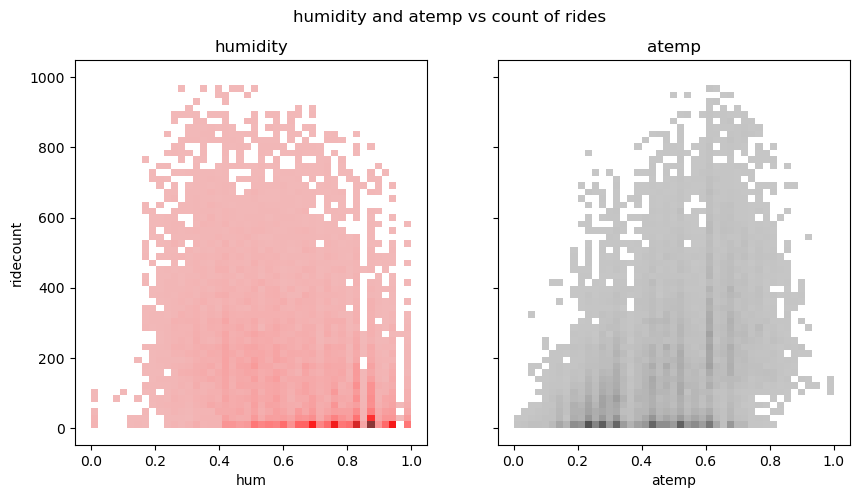

In [83]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))


sns.histplot(data=cabi_hr, x = 'hum', y='cnt', ax=ax[0], color='red',).set(title='humidity', ylabel = 'ridecount')
sns.histplot(data=cabi_hr, x = 'atemp',y='cnt', ax=ax[1], color='white', ).set(title='atemp', ylabel = 'ridecount')
fig.suptitle('humidity and atemp vs count of rides')

ax[0].set_ylim(top=1050)
ax[1].set_ylim(top=1050)
plt.show()

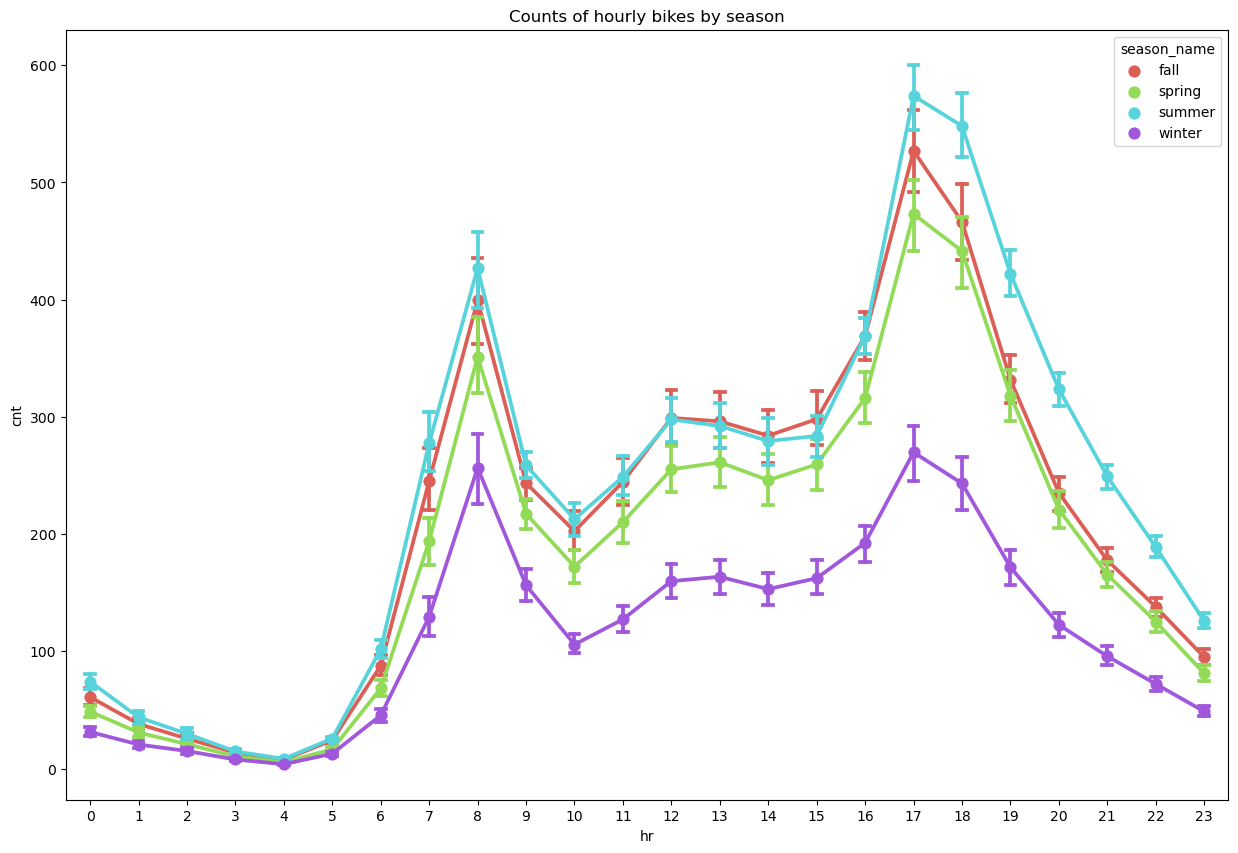

In [84]:
#counts by season graph
fig,ax = plt.subplots(figsize=(15,10))

sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="season_name", 
    capsize=.2, palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by season")
plt.show()

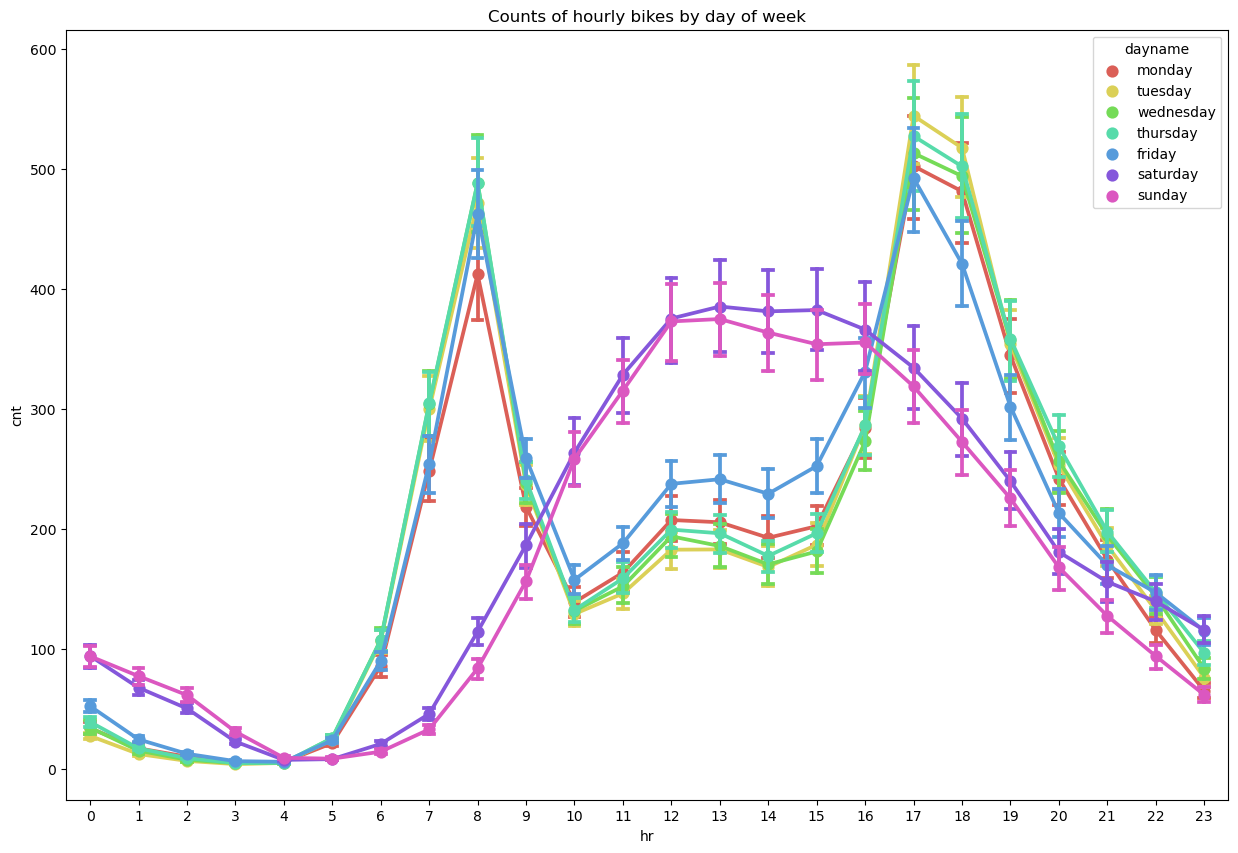

In [85]:

fig,ax = plt.subplots(figsize=(15,10))
hue_order=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="dayname", hue_order=hue_order, capsize=.2,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes by day of week")
plt.show()

Ideas: Could use ML to predict how many bikes are going to be in use during certain hour periods

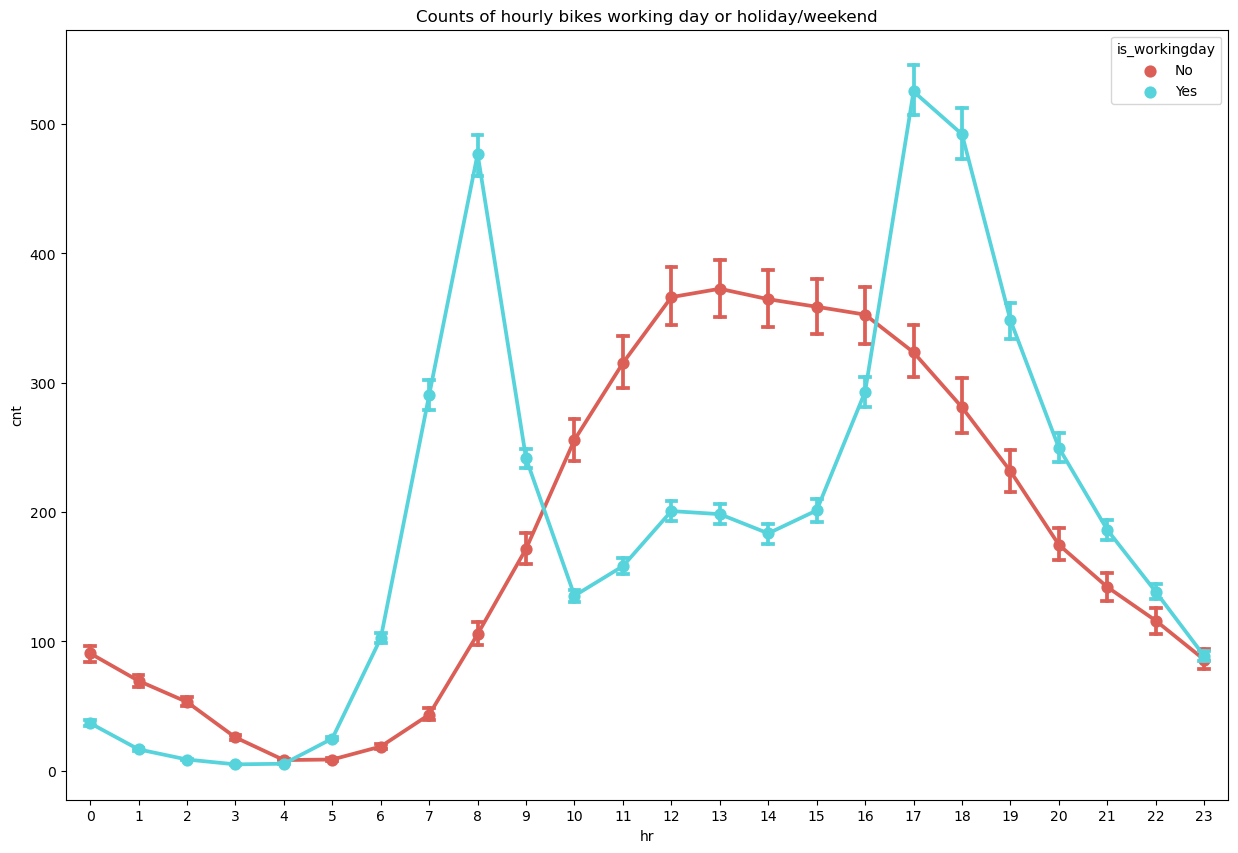

In [88]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=cabi_hr, x="hr", y="cnt", hue="is_workingday", capsize=.2,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes working day or holiday/weekend")
plt.show()

In [87]:
cabi_hr.loc[cabi_hr['workingday'] == 0, 'is_workingday'] = 'No'
cabi_hr.loc[cabi_hr['workingday'] == 1, 'is_workingday'] = 'Yes'
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,winter,saturday,No,No
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,winter,saturday,No,No
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,winter,saturday,No,No
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,winter,saturday,No,No
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,winter,saturday,No,No


In [89]:
cabi_hr.loc[cabi_hr['weathersit'] == 1, 'weathersit_desc'] = 'good'
cabi_hr.loc[cabi_hr['weathersit'] == 2, 'weathersit_desc'] = 'less_good_mist'
cabi_hr.loc[cabi_hr['weathersit'] == 3, 'weathersit_desc'] = 'worse_light_precip'
cabi_hr.loc[cabi_hr['weathersit'] == 4, 'weathersit_desc'] = 'bad_heavy_precip'
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,winter,saturday,No,No,good
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,winter,saturday,No,No,good
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,winter,saturday,No,No,good
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,winter,saturday,No,No,good
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,winter,saturday,No,No,good


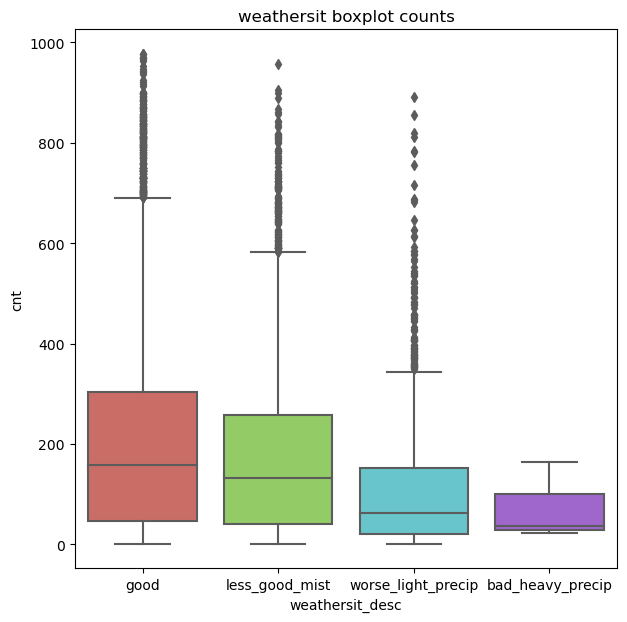

In [90]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=cabi_hr, x="weathersit_desc", y="cnt",
     palette="hls", ax=ax)
ax.set(title="weathersit boxplot counts")
plt.show()

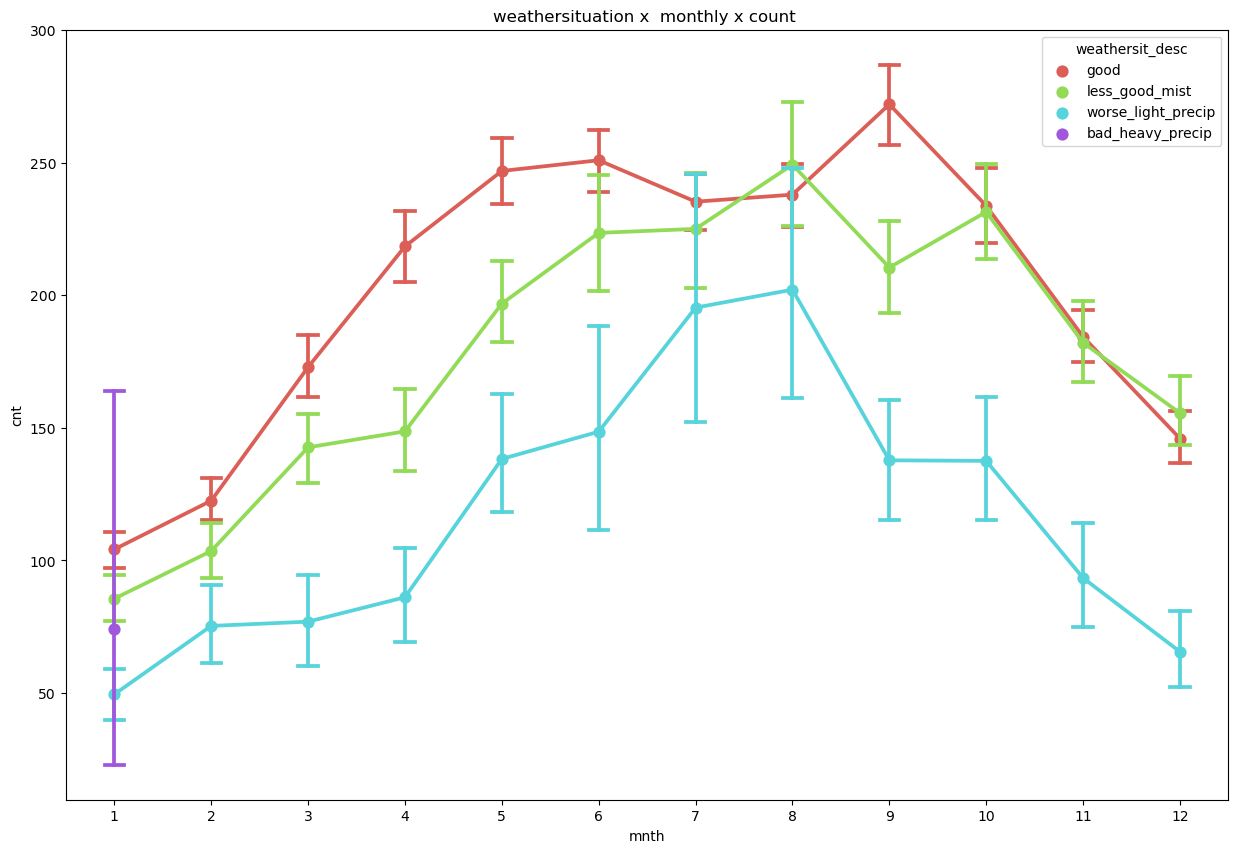

In [91]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=cabi_hr, x="mnth", y="cnt", hue="weathersit_desc", capsize=.2,
     palette="hls", ax=ax)
ax.set(title="weathersituation x  monthly x count ")
plt.show()

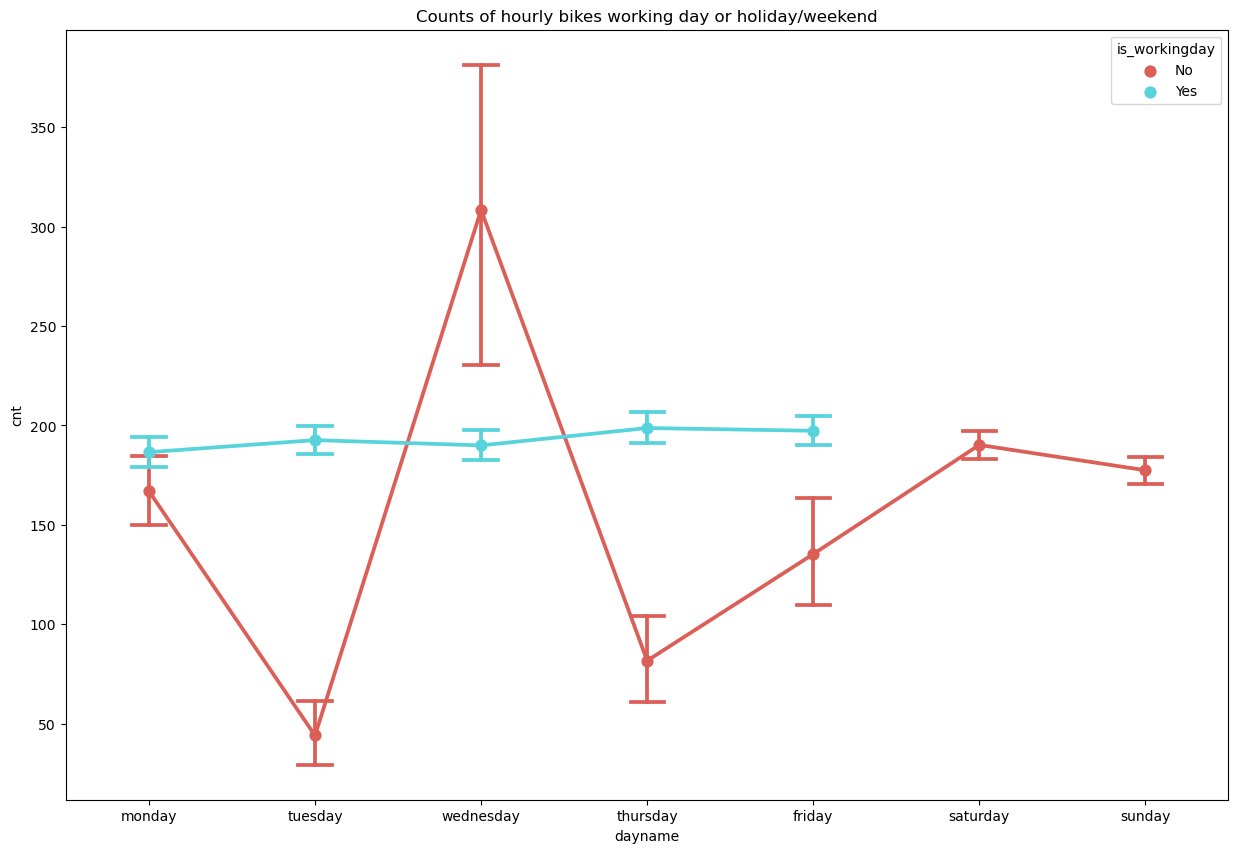

In [92]:
fig,ax = plt.subplots(figsize=(15,10))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
sns.pointplot(data=cabi_hr, x="dayname", y="cnt", hue="is_workingday", capsize=.2, order=xorder,
     palette="hls", ax=ax)
ax.set(title="Counts of hourly bikes working day or holiday/weekend")
plt.show()

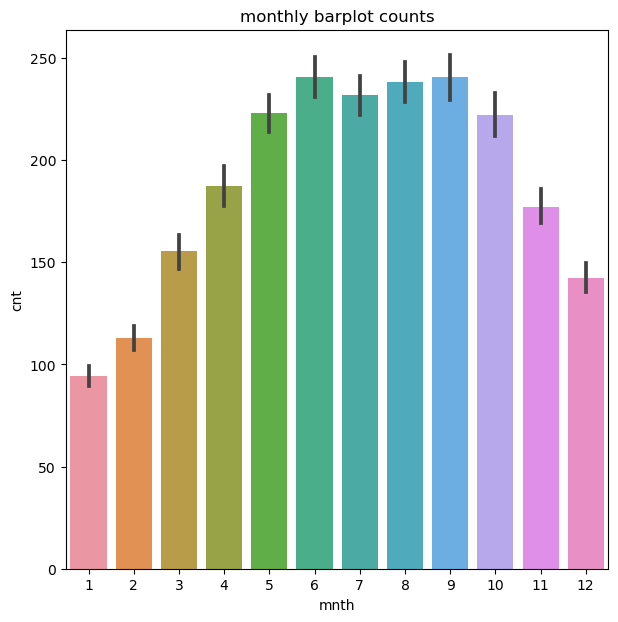

In [93]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="mnth", y="cnt",)
ax.set(title="monthly barplot counts")
plt.show()

In [94]:
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,winter,saturday,No,No,good
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,winter,saturday,No,No,good
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,winter,saturday,No,No,good
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,winter,saturday,No,No,good
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,winter,saturday,No,No,good


In [95]:
cabi_hr['temp']


0        0.24
1        0.22
2        0.22
3        0.24
4        0.24
         ... 
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, Length: 17379, dtype: float64

In [164]:
#attempting denormalization of temp column

t_min = -8
t_max= 39
result = []
for value in cabi_hr['temp']:
    denorm = (value * (t_max - t_min)+ t_min)
    result.append(denorm)


cabi_hr['temp_in_c'] = result
cabi_hr



# temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39.
#temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

# atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50.
# https://islp.readthedocs.io/en/latest/datasets/Bikeshare.html

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc,temp_in_c,year
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,3,13,16,winter,saturday,No,No,good,3.28,2011
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,8,32,40,winter,saturday,No,No,good,2.34,2011
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,5,27,32,winter,saturday,No,No,good,2.34,2011
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,3,10,13,winter,saturday,No,No,good,3.28,2011
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0,1,1,winter,saturday,No,No,good,3.28,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,4,1,12,19,0,1,1,2,...,11,108,119,winter,monday,No,Yes,less_good_mist,4.22,2012
17375,17376,2012-12-31,4,1,12,20,0,1,1,2,...,8,81,89,winter,monday,No,Yes,less_good_mist,4.22,2012
17376,17377,2012-12-31,4,1,12,21,0,1,1,1,...,7,83,90,winter,monday,No,Yes,good,4.22,2012
17377,17378,2012-12-31,4,1,12,22,0,1,1,1,...,13,48,61,winter,monday,No,Yes,good,4.22,2012


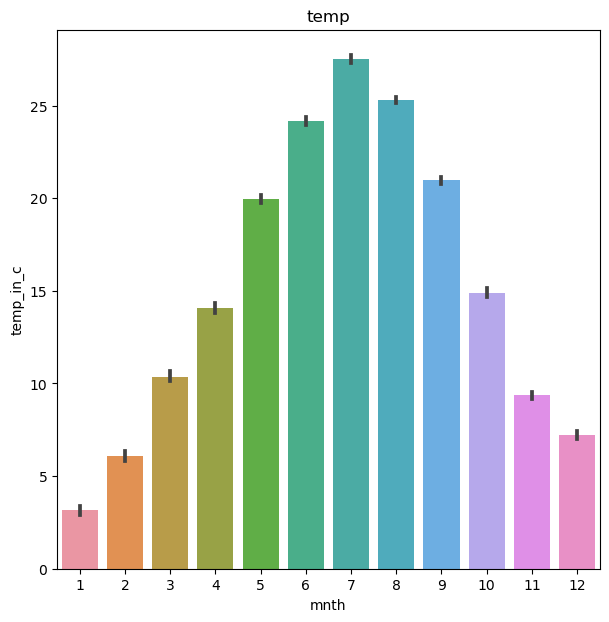

In [97]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="mnth", y="temp_in_c",)
ax.set(title="temp")
plt.show()

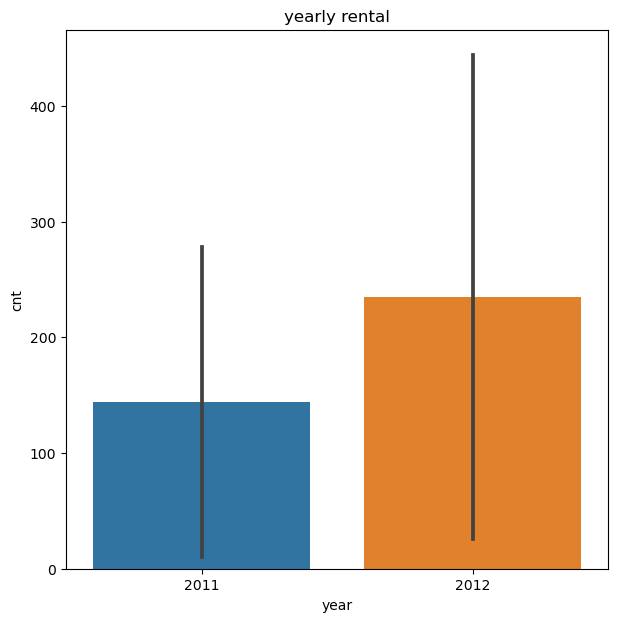

In [104]:
fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(data=cabi_hr, x="year", y='cnt', errorbar='sd')
ax.set(title="yearly rental")
plt.show()

In [105]:
cabi_hr.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in_c
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.358397
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.050138
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,7.980000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,15.500000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.020000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000


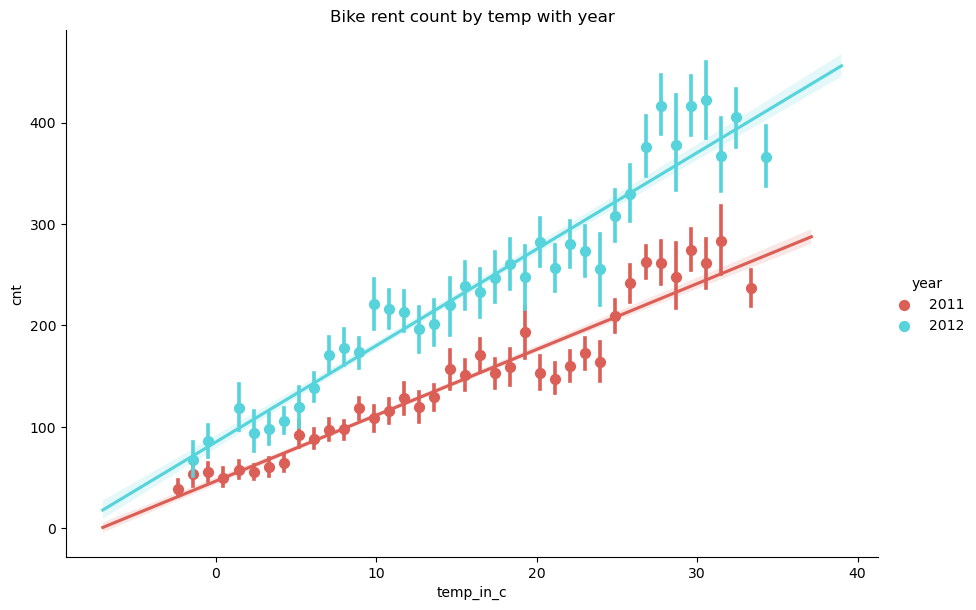

In [119]:
sns.lmplot(data=cabi_hr, x="temp_in_c", y='cnt', hue='year',height=6, aspect=1.5, palette='hls', x_bins=100 )
fig.suptitle('Temp Year Trend bike counts')
plt.title('Bike rent count by temp with year')
plt.show()

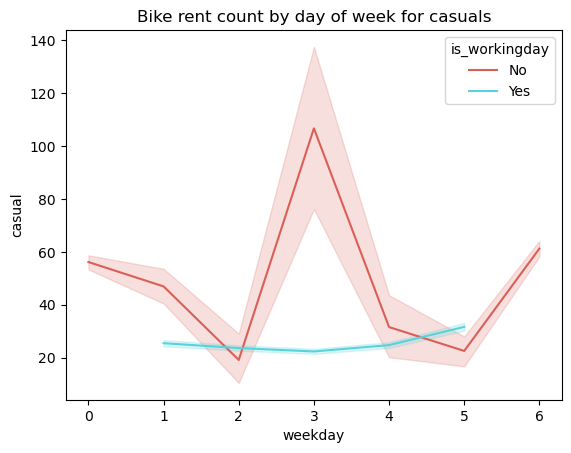

In [172]:
sns.lineplot(data=cabi_hr, x="weekday", y='casual', hue='is_workingday', palette='hls')
fig.suptitle('Temp Year Trend bike counts')
plt.title('Bike rent count by day of week for casuals')
plt.show()

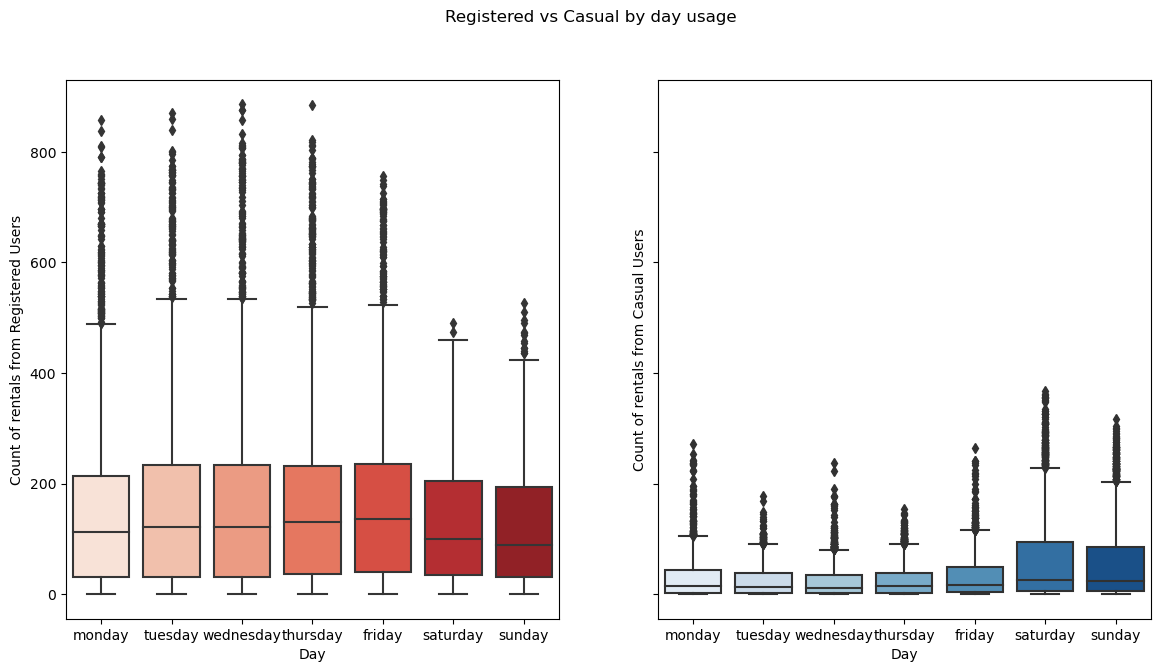

In [126]:
#Registered vs Casual by day usage box
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.boxplot(data=cabi_hr, x='dayname', y='registered', ax=ax[0], palette=("Reds"), order=xorder)
sns.boxplot(data=cabi_hr, x='dayname', y='casual', ax=ax[1], palette="Blues", order=xorder)

fig.suptitle('Registered vs Casual by day usage')

ax[0].set(xlabel = 'Day',
          ylabel = 'Count of rentals from Registered Users')

ax[1].set(xlabel = 'Day',
          ylabel = 'Count of rentals from Casual Users')

plt.show()

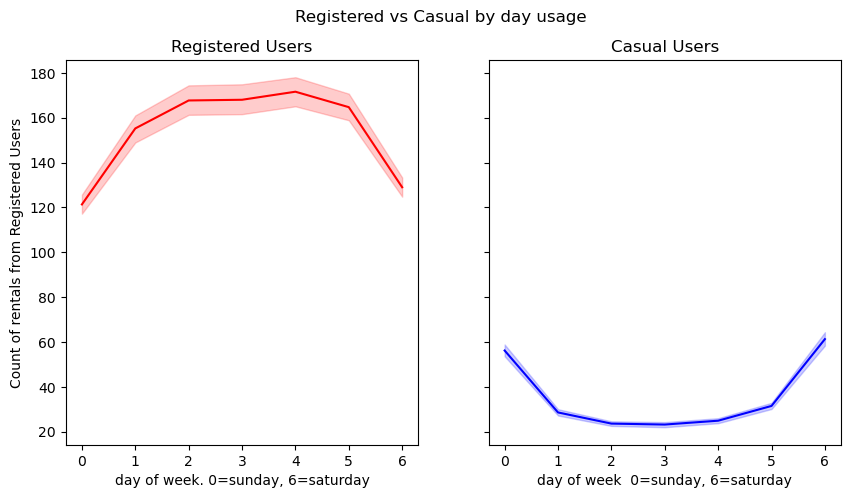

In [166]:
#Registered vs Casual by day of week usage line chart
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5))
xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.lineplot(data=cabi_hr, x='weekday', y='registered', ax=ax[0], color='red', )
sns.lineplot(data=cabi_hr, x='weekday', y='casual', ax=ax[1],color='blue')

fig.suptitle('Registered vs Casual by day usage')

ax[0].set(xlabel = 'day of week. 0=sunday, 6=saturday',
          ylabel = 'Count of rentals from Registered Users',
          title = 'Registered Users')

ax[1].set(xlabel = 'day of week  0=sunday, 6=saturday',
          ylabel = 'Count of rentals from Casual Users',
          title = 'Casual Users')
# ax[0].set_xticks('weekday')
# ax[0].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
# ax[1].set_xticks('weekday')
# ax[1].set_xticklabels(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])

plt.show()

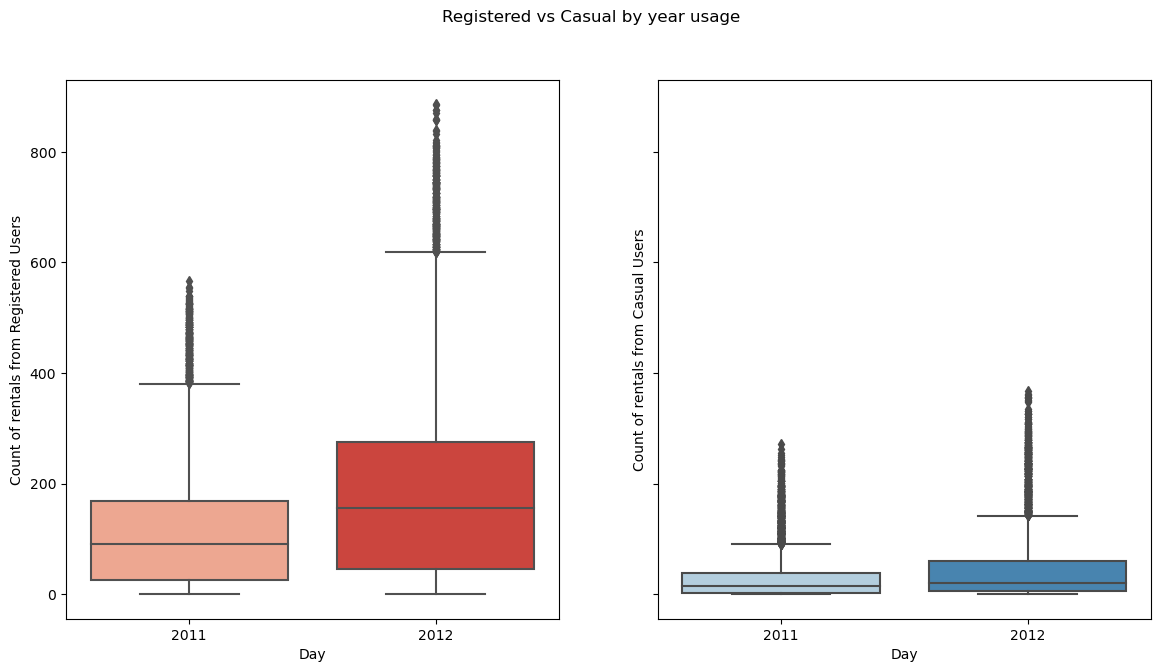

In [137]:
#Registered vs Casual by year usage
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))
#xorder=[ 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

sns.boxplot(data=cabi_hr, x='year', y='registered', ax=ax[0], palette=("Reds"))
sns.boxplot(data=cabi_hr, x='year', y='casual', ax=ax[1], palette="Blues")

fig.suptitle('Registered vs Casual by year usage')

ax[0].set(xlabel = 'Year',
          ylabel = 'Count of rentals from Registered Users')

ax[1].set(xlabel = 'Year',
          ylabel = 'Count of rentals from Casual Users')

plt.show()

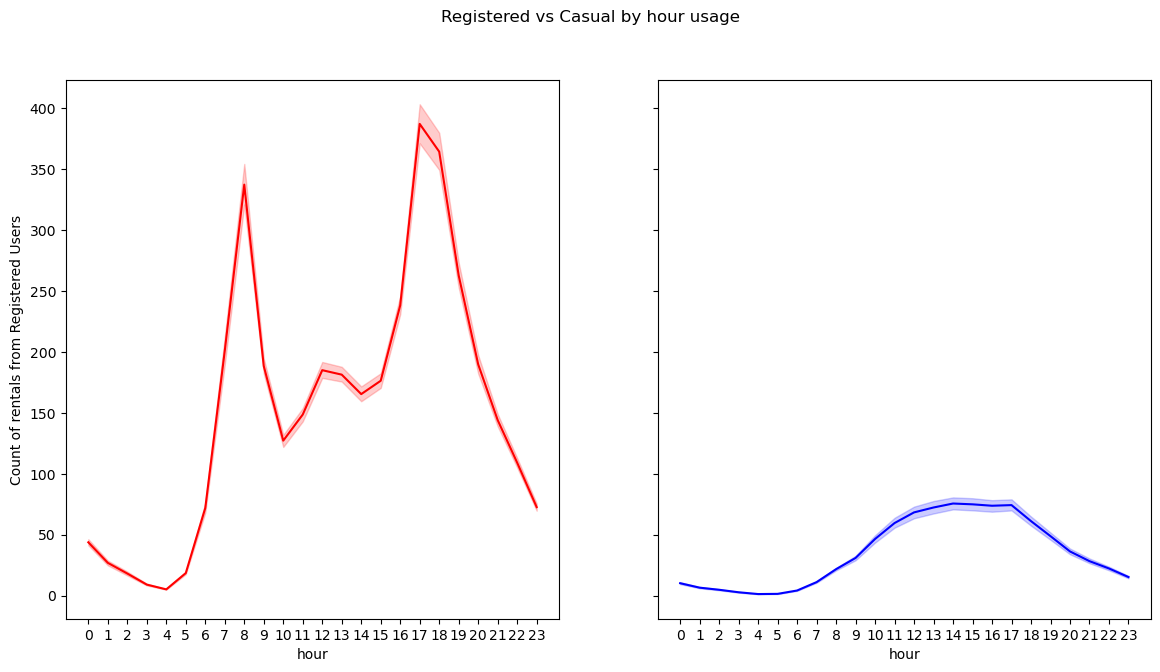

In [150]:
#Registered vs Casual by hour usage
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14,7))


sns.lineplot(data=cabi_hr, x='hr', y='registered', ax=ax[0], color='red')
sns.lineplot(data=cabi_hr, x='hr', y='casual', ax=ax[1],color='blue')

fig.suptitle('Registered vs Casual by hour usage')

ax[0].set(xlabel = 'hour',
          ylabel = 'Count of rentals from Registered Users')

ax[1].set(xlabel = 'hour',
          ylabel = 'Count of rentals from Casual Users')
ax[0].set_xticks(range(0,24))
ax[1].set_xticks(range(0,24))

plt.show()

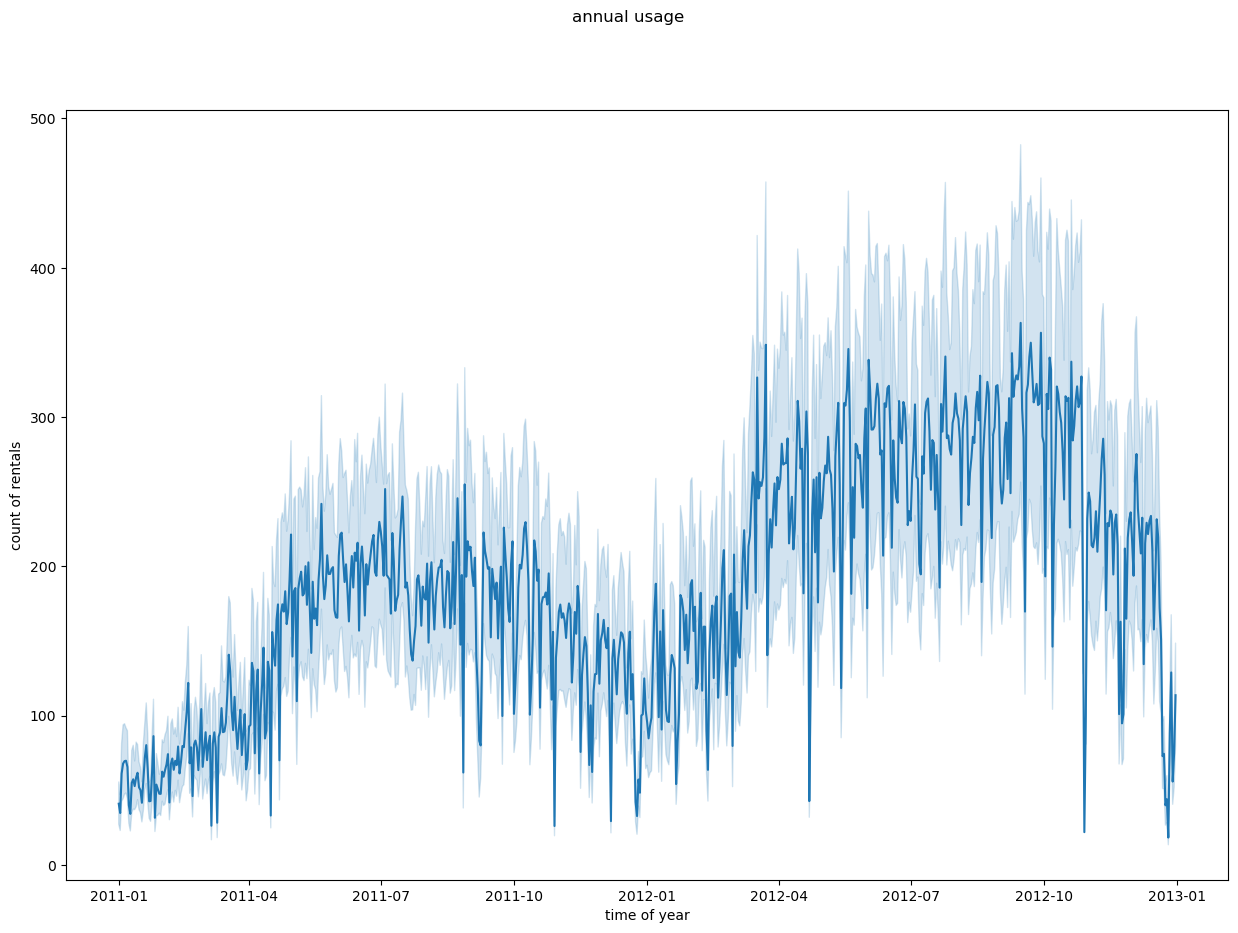

In [134]:
#annual usage trend
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=cabi_hr, x='dteday', y='cnt')
fig.suptitle('annual usage')
ax.set(ylabel='count of rentals', xlabel='time of year')
plt.show()

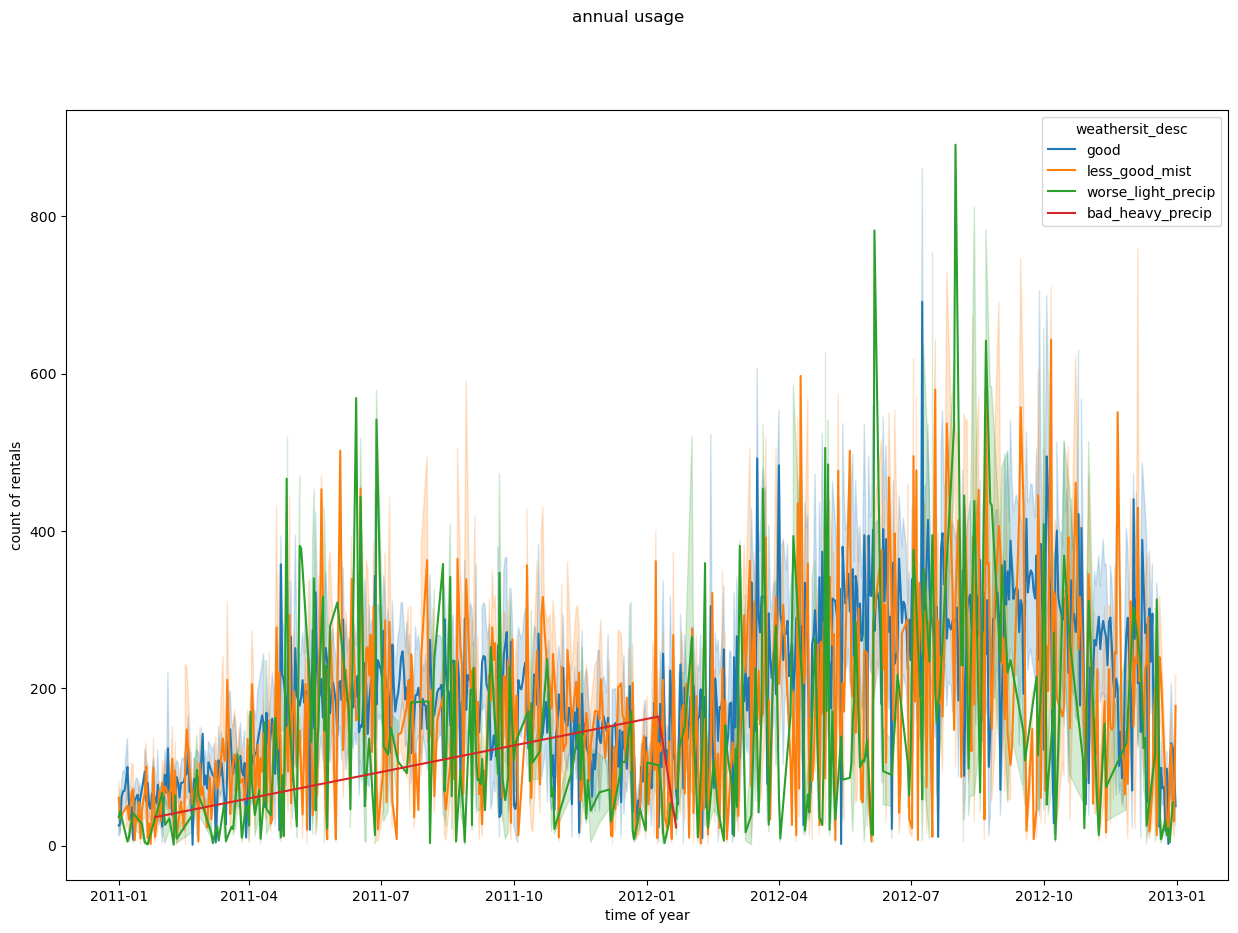

In [135]:
#annual usage trend with weather
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=cabi_hr, x='dteday', y='cnt', hue='weathersit_desc')
fig.suptitle('annual usage')
ax.set(ylabel='count of rentals', xlabel='time of year')
plt.show()

In [173]:
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc,temp_in_c,year
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,3,13,16,winter,saturday,No,No,good,3.28,2011
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,8,32,40,winter,saturday,No,No,good,2.34,2011
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,5,27,32,winter,saturday,No,No,good,2.34,2011
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,3,10,13,winter,saturday,No,No,good,3.28,2011
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,0,1,1,winter,saturday,No,No,good,3.28,2011


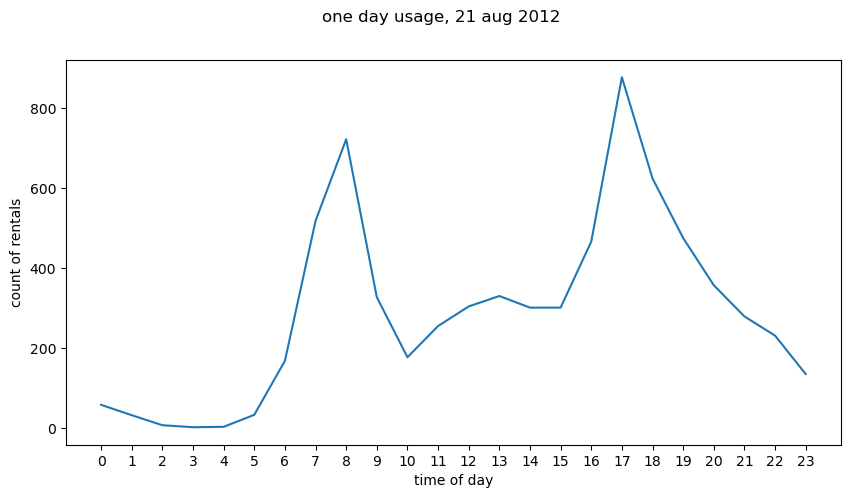

In [216]:
#one day usage, 21 aug 2012

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=cabi_hr[cabi_hr['dteday'] == '2012-08-21' ], x='hr', y='cnt')
fig.suptitle('one day usage, 21 aug 2012')
ax.set(ylabel='count of rentals', xlabel='time of day', xticks=(range(0,24)))
plt.show()

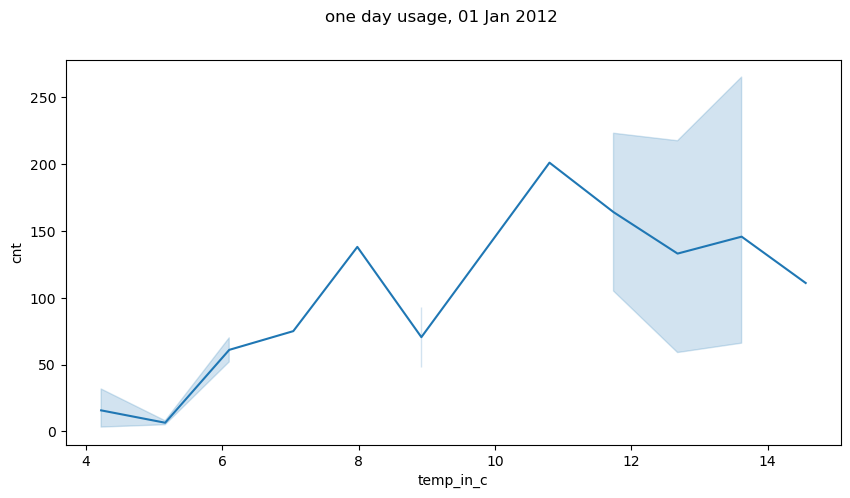

In [213]:
#one day usage, 1 jan 2012
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=cabi_hr[cabi_hr['dteday'] == '2012-01-01'], x='temp_in_c', y='cnt')
fig.suptitle('one day usage, 01 Jan 2012')
#ax.set(ylabel='count of rentals', xlabel='time of day', xticks=(range(0,24)))
plt.show()

In [206]:
cabi_hr[cabi_hr['dteday'] == '2012-08-21']

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc,temp_in_c,year
14227,14228,2012-08-21,2,1,8,0,0,2,1,2,...,7,52,59,summer,tuesday,No,Yes,less_good_mist,20.20,2012
14228,14229,2012-08-21,2,1,8,1,0,2,1,2,...,11,22,33,summer,tuesday,No,Yes,less_good_mist,20.20,2012
14229,14230,2012-08-21,2,1,8,2,0,2,1,2,...,1,7,8,summer,tuesday,No,Yes,less_good_mist,19.26,2012
14230,14231,2012-08-21,2,1,8,3,0,2,1,1,...,0,3,3,summer,tuesday,No,Yes,good,18.32,2012
14231,14232,2012-08-21,2,1,8,4,0,2,1,1,...,0,4,4,summer,tuesday,No,Yes,good,18.32,2012
14232,14233,2012-08-21,2,1,8,5,0,2,1,1,...,4,30,34,summer,tuesday,No,Yes,good,18.32,2012
14233,14234,2012-08-21,2,1,8,6,0,2,1,1,...,5,164,169,summer,tuesday,No,Yes,good,18.32,2012
14234,14235,2012-08-21,2,1,8,7,0,2,1,1,...,19,500,519,summer,tuesday,No,Yes,good,20.20,2012
14235,14236,2012-08-21,2,1,8,8,0,2,1,1,...,27,696,723,summer,tuesday,No,Yes,good,20.20,2012
14236,14237,2012-08-21,2,1,8,9,0,2,1,1,...,47,281,328,summer,tuesday,No,Yes,good,22.08,2012


In [222]:
#creating a new datetime object that's a combination of all the date and times

cabi_hr['Date'] = pd.to_datetime(cabi_hr['dteday'])
cabi_hr['Time'] = pd.to_datetime(cabi_hr['hr']).dt.time


0        00:00:00
1        00:00:00
2        00:00:00
3        00:00:00
4        00:00:00
           ...   
17374    00:00:00
17375    00:00:00
17376    00:00:00
17377    00:00:00
17378    00:00:00
Name: Time, Length: 17379, dtype: object

In [219]:
cabi_hr['Datetime'] = cabi_hr.apply(lambda x: pd.datetime.combine(x['Date'], x['Time']), axis=1)

/var/folders/dt/36zskqd97kv75gn6l517twyh0000gn/T/ipykernel_61848/3569829227.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  cabi_hr['Datetime'] = cabi_hr.apply(lambda x: pd.datetime.combine(x['Date'], x['Time']), axis=1)


In [220]:
cabi_hr = cabi_hr.drop(['Date', 'Time'], axis=1)
cabi_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,season_name,dayname,is_holiday,is_workingday,weathersit_desc,temp_in_c,year,Datetime
0,1,2011-01-01,4,0,1,0,0,6,0,1,...,13,16,winter,saturday,No,No,good,3.28,2011,2011-01-01
1,2,2011-01-01,4,0,1,1,0,6,0,1,...,32,40,winter,saturday,No,No,good,2.34,2011,2011-01-01
2,3,2011-01-01,4,0,1,2,0,6,0,1,...,27,32,winter,saturday,No,No,good,2.34,2011,2011-01-01
3,4,2011-01-01,4,0,1,3,0,6,0,1,...,10,13,winter,saturday,No,No,good,3.28,2011,2011-01-01
4,5,2011-01-01,4,0,1,4,0,6,0,1,...,1,1,winter,saturday,No,No,good,3.28,2011,2011-01-01
